#  <center >Clasificación de Flores Iris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris() 

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.filename

'C:\\Users\\sacel\\APython3\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [6]:
X = iris.data[:,:2]
Y = iris.target

In [7]:
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
h = (x_max-x_min)/100 # Tener cien trozos del mínimo al máximo

xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))



In [8]:
x_min,x_max,y_min,y_max

(3.3, 8.9, 1.0, 5.4)

In [9]:
xx, xx.shape

(array([[3.3  , 3.356, 3.412, ..., 8.732, 8.788, 8.844],
        [3.3  , 3.356, 3.412, ..., 8.732, 8.788, 8.844],
        [3.3  , 3.356, 3.412, ..., 8.732, 8.788, 8.844],
        ...,
        [3.3  , 3.356, 3.412, ..., 8.732, 8.788, 8.844],
        [3.3  , 3.356, 3.412, ..., 8.732, 8.788, 8.844],
        [3.3  , 3.356, 3.412, ..., 8.732, 8.788, 8.844]]), (79, 100))

In [10]:
yy, yy.shape

(array([[1.   , 1.   , 1.   , ..., 1.   , 1.   , 1.   ],
        [1.056, 1.056, 1.056, ..., 1.056, 1.056, 1.056],
        [1.112, 1.112, 1.112, ..., 1.112, 1.112, 1.112],
        ...,
        [5.256, 5.256, 5.256, ..., 5.256, 5.256, 5.256],
        [5.312, 5.312, 5.312, ..., 5.312, 5.312, 5.312],
        [5.368, 5.368, 5.368, ..., 5.368, 5.368, 5.368]]), (79, 100))

In [11]:
# Creamos la red de valores
x_plot = np.c_[xx.ravel(),yy.ravel()]

In [12]:
x_plot.shape

(7900, 2)

In [13]:
np.stack([xx.ravel(),yy.ravel()]).T.shape

(7900, 2)

In [14]:
# Maquina Vectorial Lineal
C = 1.
svc = svm.SVC(kernel = "linear", C= C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
print(Ypred.shape)
Ypred = Ypred.reshape(xx.shape)

(7900,)


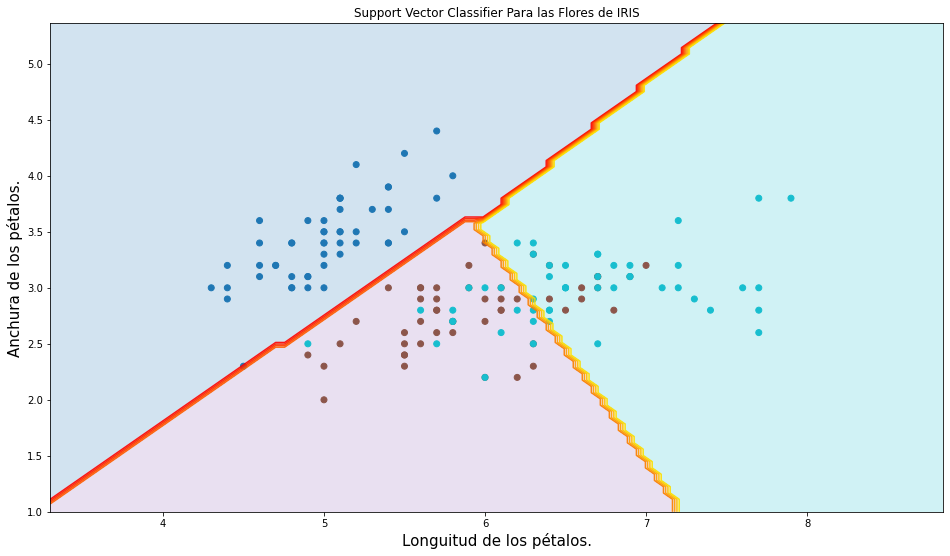

In [15]:
plt.figure(figsize = (16,9))
plt.contour(xx,yy,Ypred, cmap = "autumn",alpha = .9)
plt.contourf(xx,yy,Ypred, cmap = plt.cm.tab10,alpha = .2)
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.tab10)
plt.xlabel("Longuitud de los pétalos.", size = 15)
plt.ylabel("Anchura de los pétalos.", size = 15)
plt.title("Support Vector Classifier Para las Flores de IRIS")
plt.show()

In [16]:
# Tratar con Sigmoide
C = 1.0
svc = svm.SVC(kernel = "sigmoid", C = C, decision_function_shape="ovr").fit(X,Y)
# decision_function_shape='ovr' para que ajuste los datos lo mejor posible
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
np.unique(Ypred)

array([2])

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: No contour levels were found within the data range.
  


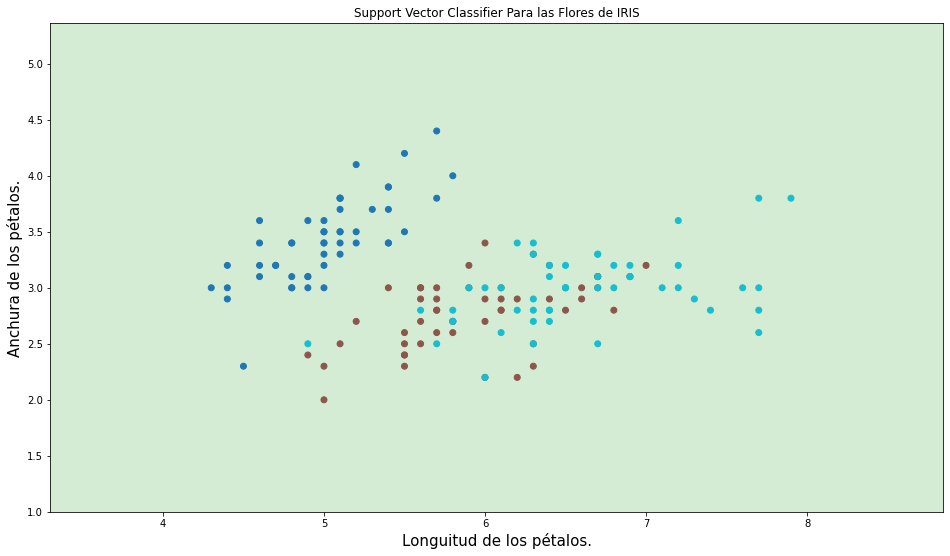

In [18]:
plt.figure(figsize = (16,9))
plt.contour(xx,yy,Ypred, cmap = "autumn",alpha = .9)
plt.contourf(xx,yy,Ypred, cmap = plt.cm.tab10,alpha = .2)
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.tab10)
plt.xlabel("Longuitud de los pétalos.", size = 15)
plt.ylabel("Anchura de los pétalos.", size = 15)
plt.title("Support Vector Classifier Para las Flores de IRIS")
plt.show()

In [19]:
f"Predijo que todos los valores serían {iris.target_names[1]}."

'Predijo que todos los valores serían versicolor.'

In [20]:
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
X = iris.data
Y = iris.target

In [22]:
X, Y = shuffle(X,Y)

In [23]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [24]:
parameters = [{
    "kernel":["rbf"],
    "gamma": [1e-04,1e-03,1e-02,0.1,0.2,0.5,5],
    "C":[1,10,100,1000]
}    ,{
        "kernel":["linear"],
        "C": [1,10,100,1000]
    }
]

In [25]:
parameters

[{'kernel': ['rbf'],
  'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 5],
  'C': [1, 10, 100, 1000]},
 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [26]:
clf = GridSearchCV(svm.SVC(decision_function_shape = "ovr"), param_grid=parameters, cv = 10) # CV - cross Validation
clf.fit(X_train,Y_train)

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
clf.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [28]:
clf.best_score_

0.9642857142857143

In [29]:
model = svm.SVC(kernel = "rbf", gamma = 0.001 , C = 1e10, decision_function_shape = "ovr")
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
model.score(X,Y)

0.9666666666666667

In [31]:
clf.cv_results_

{'mean_fit_time': array([0.        , 0.00065222, 0.00156212, 0.00156331, 0.00156176,
        0.        , 0.00156162, 0.00157163, 0.00155709, 0.        ,
        0.        , 0.00156696, 0.        , 0.00156467, 0.        ,
        0.00156233, 0.00156212, 0.        , 0.00156312, 0.00156467,
        0.        , 0.        , 0.00156047, 0.00156262, 0.00156221,
        0.        , 0.        , 0.00156772, 0.        , 0.00156062,
        0.        , 0.        ]),
 'std_fit_time': array([0.        , 0.00195665, 0.00468636, 0.00468993, 0.00468528,
        0.        , 0.00468485, 0.00471489, 0.00467126, 0.        ,
        0.        , 0.00470088, 0.        , 0.00469401, 0.        ,
        0.004687  , 0.00468636, 0.        , 0.00468936, 0.00469401,
        0.        , 0.        , 0.00468142, 0.00468786, 0.00468664,
        0.        , 0.        , 0.00470316, 0.        , 0.00468185,
        0.        , 0.        ]),
 'mean_score_time': array([0.00156269, 0.00156229, 0.        , 0.        , 0.      

In [32]:
(clf.predict(X_test)==Y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [33]:
# Imprimir todas las combinacione
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
a = [[print("{} (+/-{}) para {}.".format(round(m,3),round(s,3),p))] for m,s,p in zip(means,stds,params)]

0.384 (+/-0.162) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}.
0.384 (+/-0.162) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}.
0.955 (+/-0.057) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}.
0.955 (+/-0.042) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}.
0.964 (+/-0.041) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}.
0.964 (+/-0.041) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}.
0.938 (+/-0.067) para {'C': 1, 'gamma': 5, 'kernel': 'rbf'}.
0.384 (+/-0.162) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}.
0.955 (+/-0.057) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}.
0.955 (+/-0.042) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}.
0.955 (+/-0.042) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}.
0.964 (+/-0.041) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}.
0.946 (+/-0.056) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}.
0.938 (+/-0.067) para {'C': 10, 'gamma': 5, 'kernel': 'rbf'}.
0.955 (+/-0.057) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}.
0.955 (+/-0.042) para {'C': 100, 'g

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lm.score(X_train,Y_train)

0.9278977231967253

In [37]:
lm.intercept_

0.31478586523923213

In [38]:
lm.coef_

array([-0.09050547, -0.09124922,  0.190689  ,  0.65118636])

In [39]:
np.abs(np.round(lm.predict(X_test),0))==Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Resumen final de la clasificación de Iris

In [40]:
def svm_iris(C=1.0,gamma = 0.01, kernel = "rbf", degree = 3,size = False):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import svm, datasets 
    # Cargar datasets
    irirs = datasets.load_iris()
    # Definir variables predictoras y objetivo
    X = iris.data[:,:2]
    Y = iris.target
    # Variables para probar el modelo
    x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
    h = (x_max-x_min)/100 # Tener cien trozos del mínimo al máximo

    xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    x_plot = np.c_[xx.ravel(),yy.ravel()]

    # Tratar con plotly
    if kernel=="rbf":
        svc = svm.SVC(kernel=kernel,C=C,gamma=gamma, decision_function_shape="ovr")
    elif kernel=="linear":
        svc = svm.SVC(kernel=kernel,C=C)
    elif kernel=="poly":
        svc = svm.SVC(kernel=kernel,C=C, degree=degree, decision_function_shape="ovr")
    else:
        svc = svm.SVC(kernel=kernel,C=C,decision_function_shape="ovr")
    svc.fit(X,Y)
    # Predicción
    Ypred = svc.predict(x_plot)
    Ypred = Ypred.reshape(xx.shape)
    # Plot
    if size:
        plt.figure(figsize=size)
    else:
        plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap = plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0],X[:,1],c = Y, cmap = "autumn")
    plt.contour(xx,yy,Ypred, cmap = "autumn",alpha = .9)
    plt.xlabel("Longuitud de los pétalos.", size = 15)
    plt.ylabel("Anchura de los pétalos.", size = 15)
    plt.title(f"Support Vector Classifier Para las Flores de IRIS con Kernel: {kernel}")

In [41]:
from ipywidgets import fixed, interactive

In [42]:
interactive(svm_iris,C=[10**l for l in range(0,8)], gamma=[1e-05,1e-04,1e-03,1e-02,1e-01,0.2,0.3,0.5,0.99,1,2],
         degree=[l for l in range(6)], kernel=['poly','linear','rbf','sigmoid'])

interactive(children=(Dropdown(description='C', options=(1, 10, 100, 1000, 10000, 100000, 1000000, 10000000), …